# The Best Cereal of Them All

This is a short project analyzing and visualizing cereal nutrion values.

#### Data Dictionary:

- `name:` name of cereal
- `mfr:` manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- `type:`
    - C = Cold
    - H = Hot
- `calories:` calories per serving
- `protein:` grams of protein
- `fat:` grams of fat
- `sodium:` milligrams of sodium
- `fiber:` grams of dietary fiber
- `carbo:` grams of complex carbohydrates
- `sugars:` grams of sugars
- `potass:` milligrams of potassium
- `vitamins:` vitamins and minerals (0, 25, or 100, indicating the typical percentage of FDA recommended)
- `weight:` weight in ounces of one serving
- `cups:` number of cups in one serving
- `rating:` a rating of the cereals

#### Conclusion:

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Read in data
data = pd.read_csv(r'C:\Users\david\Desktop\Work Data\Unpackaged\Cereal Nutrion\cereal.csv')

# Remove unnecessary data
data = data.drop(columns=['shelf', 'type'])

data.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,N,70,4,1,130,10.0,5.0,6,280,25,1.0,0.33,68.402973
1,100% Natural Bran,Q,120,3,5,15,2.0,8.0,8,135,0,1.0,1.00,33.983679
2,All-Bran,K,70,4,1,260,9.0,7.0,5,320,25,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0,330,25,1.0,0.50,93.704912
4,Almond Delight,R,110,2,2,200,1.0,14.0,8,-1,25,1.0,0.75,34.384843


In [2]:
# Check for any null or missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   calories  77 non-null     int64  
 3   protein   77 non-null     int64  
 4   fat       77 non-null     int64  
 5   sodium    77 non-null     int64  
 6   fiber     77 non-null     float64
 7   carbo     77 non-null     float64
 8   sugars    77 non-null     int64  
 9   potass    77 non-null     int64  
 10  vitamins  77 non-null     int64  
 11  weight    77 non-null     float64
 12  cups      77 non-null     float64
 13  rating    77 non-null     float64
dtypes: float64(5), int64(7), object(2)
memory usage: 8.5+ KB


In [3]:
# Check for any duplicate values
data.duplicated().value_counts()

False    77
dtype: int64

## Initial Observations

Our dataframe contains 77 rows and there are no missing values as well as duplicate values. Let's clean the dataset.

## Data Cleaning

The first thing we're going to do and standardize the nutrional values by weight.

Wich cereal is the most popular overall?
What are the top three most popular cereal for each manu? frequency distri
How many different cereals does each manufacturer make?
What is the average rating for each manufacturer?
What is the average nutritional break down for each manufacturer?

t test
distribution bar graphs for each nutritional value
Count of ingredients prevalence

In [4]:
# Create a dataframe without string values and weight value
cereals = data.iloc[:,~data.columns.isin(['name', 'mfr', 'rating'])].div(data['weight'], axis=0)

# Divide integer and float values by weight float for every row
cereals = cereals.div(data['weight'], axis=0)

# Concat this new dataframe with the string values from the old dataframe
cereals = pd.concat([data.iloc[:,data.columns.isin(['name','mfr','rating'])], cereals], axis=1)
cereals

,name,mfr,rating,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,100% Bran,N,68.402973,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,1.0,0.33
1,100% Natural Bran,Q,33.983679,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,1.0,1.00
2,All-Bran,K,59.425505,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,1.0,0.33
3,All-Bran with Extra Fiber,K,93.704912,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,1.0,0.50
4,Almond Delight,R,34.384843,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,39.106174,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,1.0,0.75
73,Trix,G,27.753301,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,1.0,1.00
74,Wheat Chex,R,49.787445,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,0.67
75,Wheaties,G,51.592193,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,1.00


Now that our dataset is all cleaned up we can move onto the analysis.

## Analysis (l)

Here we're going to find out which cereal has the highest rating when compared to every other cereal.

Text(0.5, 1.0, 'Cereal Ratings')

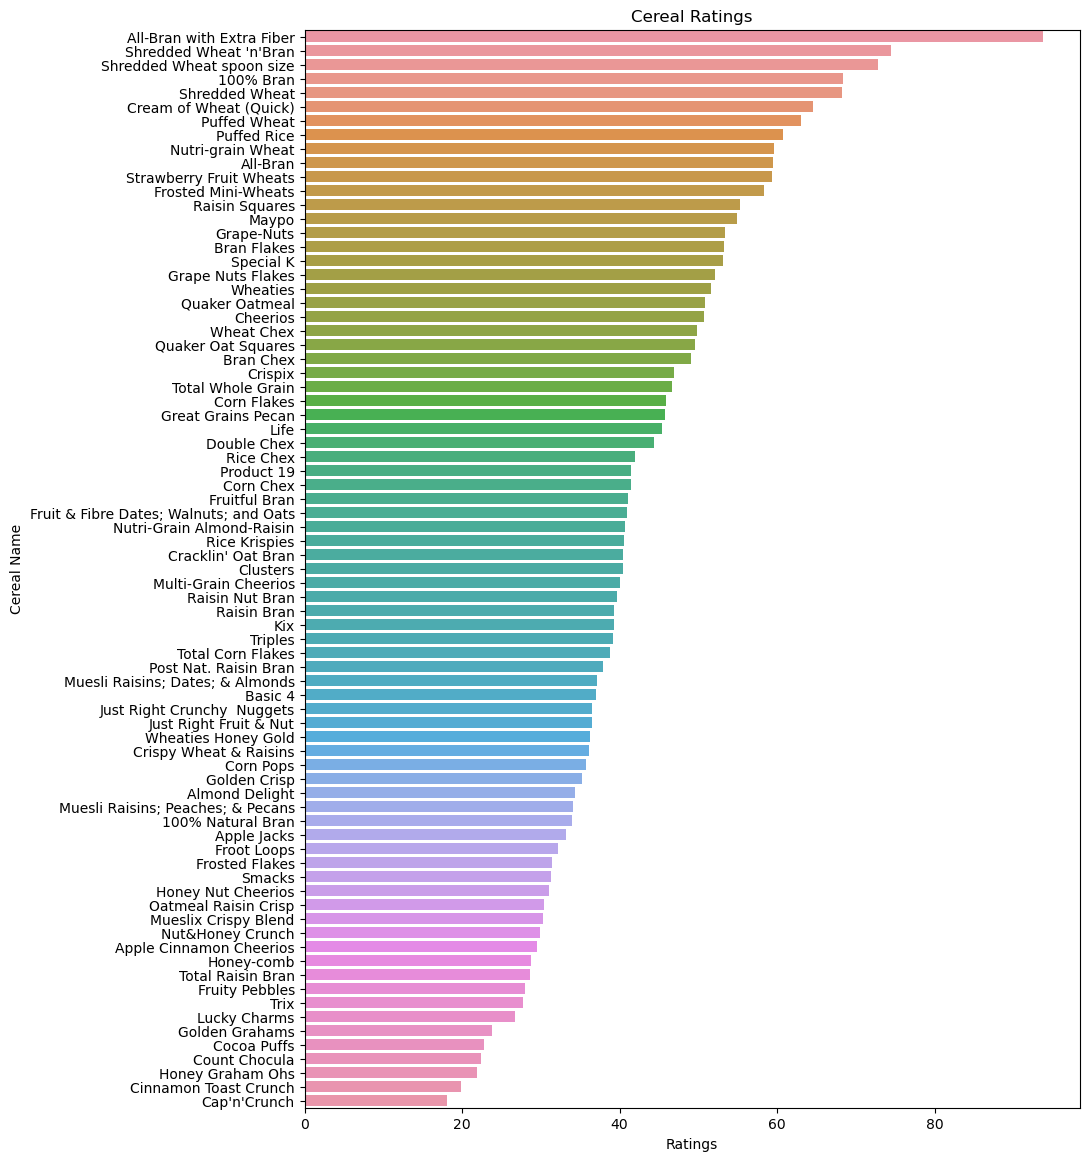

In [5]:
graph1 = data.sort_values(['rating'], ascending=False)

plt.figure(figsize=(10,14))
sns.barplot(x=graph1['rating'],y=graph1['name'])
plt.ylabel('Cereal Name')
plt.xlabel('Ratings')
plt.title('Cereal Ratings')

## Analysis (ll)

What are the three highest rated cereals for each manufacturer?

Text(0.5, 1.0, 'Number of Cereals Sold per Brand')

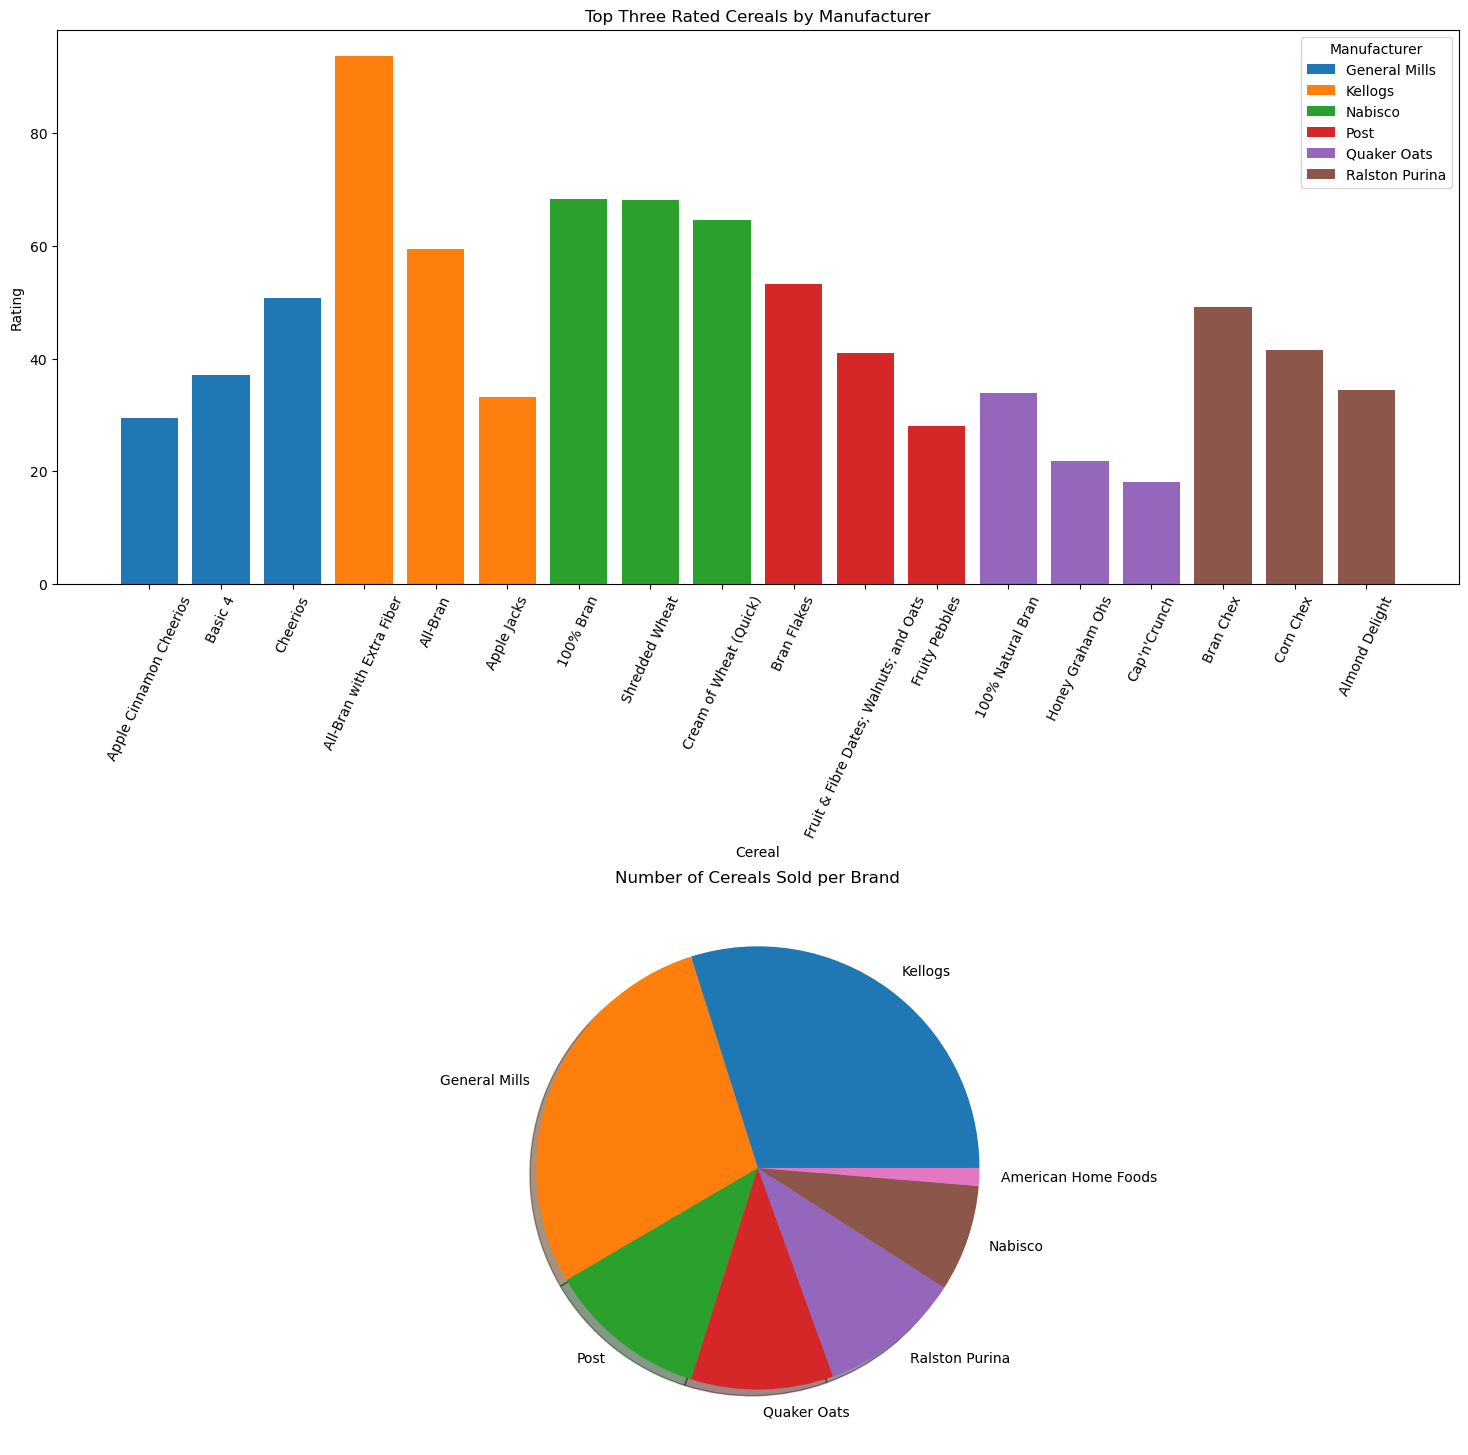

In [11]:
# Create seperate dataframe for each different manufacturer 
american_home_food_products = data[data['mfr'] == 'A']
general_mills = data[data['mfr'] == 'G']
kelloggs = data[data['mfr'] == 'K']
nabisco = data[data['mfr'] == 'N']
post = data[data['mfr'] == 'P']
quaker_oats = data[data['mfr'] == 'Q']
ralston_purina = data[data['mfr'] == 'R']

# Include only the top three results and sort values by ratings for each dataframe
modified_american_home_food_products = american_home_food_products.sort_values(['rating'], ascending=False)
modified_general_mills = general_mills.iloc[:3].sort_values(['rating'], ascending=True)
modified_kelloggs = kelloggs.iloc[:3].sort_values(['rating'], ascending=False)
modified_nabisco = nabisco.iloc[:3].sort_values(['rating'], ascending=False)
modified_post = post.iloc[:3].sort_values(['rating'], ascending=False)
modified_quaker_oats = quaker_oats.iloc[:3].sort_values(['rating'], ascending=False)
modified_ralston_purina = ralston_purina.iloc[:3].sort_values(['rating'], ascending=False)

# Top Three Cereals graph
fig, ax = plt.subplots(2, 1, figsize=(20,20))
plt.tight_layout(pad=20)

ax[0].bar(modified_general_mills['name'], modified_general_mills['rating'], label='General Mills')
ax[0].bar(modified_kelloggs['name'], modified_kelloggs['rating'], label='Kellogs')
ax[0].bar(modified_nabisco['name'], modified_nabisco['rating'], label='Nabisco')
ax[0].bar(modified_post['name'], modified_post['rating'], label='Post')
ax[0].bar(modified_quaker_oats['name'], modified_quaker_oats['rating'], label='Quaker Oats')
ax[0].bar(modified_ralston_purina['name'], modified_ralston_purina['rating'], label='Ralston Purina')

# Modifications to Top Three Cereals graph
ax[0].tick_params(axis='x', labelrotation=65)
ax[0].legend(title='Manufacturer')
ax[0].set_title('Top Three Rated Cereals by Manufacturer')
ax[0].set_ylabel('Rating')
ax[0].set_xlabel('Cereal')

# Number of Cereals Sold graph
ax[1].pie(cereals['mfr'].value_counts(),
          labels=['Kellogs', 'General Mills', 'Post', 'Quaker Oats', 'Ralston Purina', 'Nabisco', 'American Home Foods'], 
          shadow=True)
ax[1].set_title('Number of Cereals Sold per Brand')

# FIX ABOVE PIE GRAPH

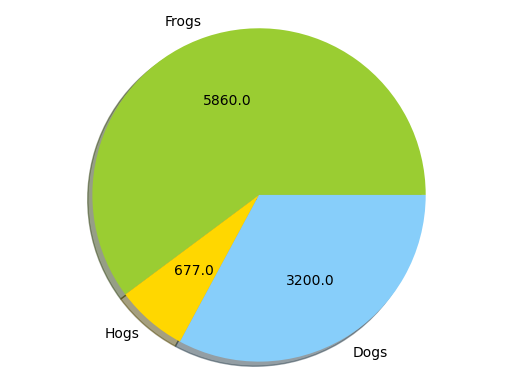

In [12]:
import matplotlib.pyplot as plt
import numpy

labels = 'Frogs', 'Hogs', 'Dogs'
sizes = numpy.array([5860, 677, 3200])
colors = ['yellowgreen', 'gold', 'lightskyblue']

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()

TypeError: 'function' object is not subscriptable

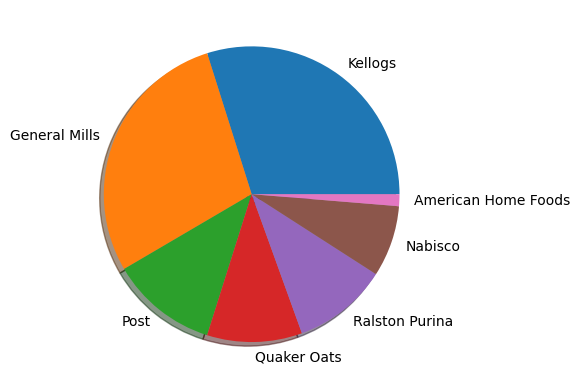

In [9]:
# Number of Cereals Sold graph
plt.pie(cereals['mfr'].value_counts(),
          labels=['Kellogs', 'General Mills', 'Post', 'Quaker Oats', 'Ralston Purina', 'Nabisco', 'American Home Foods'], 
          shadow=True)
plt.title['Number of Cereals Sold per Brand']

In [ ]:
new = data.groupby('mfr').mean().sort_values(['rating'],ascending=False)
new

In [ ]:
plt.bar(new['rating'], new.index)
plt.title('Overall Cereals Rating by Manufacturer')
# plt.axis('off')
plt.show()

In [ ]:
plt.pie(new['rating'], labels=new.index, shadow=True, autopct='%1.1f%%')
plt.title('Overall Cereals Rating by Manufacturer')
plt.axis('off')
plt.show()

In [ ]:
sns.barplot(x=data['rating'].sort_values(ascending=False), y=data['name'])

In [ ]:
plt.bar(modified_general_mills['name'], modified_general_mills['rating'])
plt.bar(modified_nabisco['name'], modified_nabisco['rating'])
plt.bar(modified_kelloggs['name'], modified_kelloggs['rating'])
# plt.bar(modified_nabisco['name'], modified_nabisco['rating'])

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle('Top Rated Cereals Between Manufacturers #1')

plt.subplot(131)
plt.bar(modified_general_mills['name'], modified_general_mills['rating'])
plt.title('General Mills')
plt.xticks(rotation=90)

plt.subplot(132)
plt.bar(modified_kelloggs['name'], modified_kelloggs['rating'])
plt.title('Kelloggs')
plt.xticks(rotation=90)

plt.subplot(133)
plt.bar(modified_nabisco['name'], modified_nabisco['rating'])
plt.title('Nabisco')
plt.xticks(rotation=90)

plt.tight_layout(pad=3)

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle('Top Rated Cereals Between Manufacturers #2')

plt.subplot(1,3,1)
plt.bar(modified_post['name'], modified_post['rating'])
plt.title('Post')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
plt.bar(modified_quaker_oats['name'], modified_quaker_oats['rating'])
plt.title('Quaker Oats')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
plt.bar(modified_ralston_purina['name'], modified_ralston_purina['rating'])
plt.title('Ralston Purina')
plt.xticks(rotation=90)

plt.tight_layout(pad=3)

In [ ]:
data.index()

In [ ]:
# Create a groupby object to analyze max ratings for each manufacturer
mfr_group = data.groupby(['mfr'])['rating'].min()
mfr_group